In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
import matplotlib as mpl
from scipy import stats as st
from functools import reduce
import numpy as np
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
company_time = pd.read_csv('project_sql_result_01.csv')
location_tips = pd.read_csv('project_sql_result_04.csv')
result = pd.read_csv('project_sql_result_07.csv')

<a name="table_of_contents"></a> 
## Table of contents  


**Our general reserach goal**

_Is to get a better understanding of the taxi companies in Chicago, as well as the areas and their number of passengers. We also want to find out whether the weather has an influence on the taxi business in order to find better solutions for future problems if necessary or to develop a good market strategy that will help us to solve problems._ 

### Step 4. Exploratory data analysis (Python)

**For these two datasets you now need to**

   1. import the files [click here](#1)
   2. study the data they contain [click here](#2)
   3. make sure the data types are correct [click here](#3)
   4. identify the top 10 neighborhoods in terms of drop-offs [click here](#4)
   5. make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs [click here](#5)
   6. draw conclusions based on each graph and explain the results [click here](#6)

<a name="2"></a> 
**2. study the data they contain**

In [3]:
location_tips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [4]:
location_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
company_time.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
company_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


**Conclusion** 

the data are not particularly abnormal. 

<a name="3"></a> 
**3. make sure the data types are correct**  [back to the tasks](#table_of_contents)   

In [7]:
display(company_time.head())
company_time.dtypes

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


company_name    object
trips_amount     int64
dtype: object

In [8]:
display(location_tips.head())
location_tips.dtypes

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


dropoff_location_name     object
average_trips            float64
dtype: object

In [9]:
location_tips['average_trips'] = pd.to_numeric(location_tips['average_trips'], downcast='float')
location_tips.dtypes

dropoff_location_name     object
average_trips            float32
dtype: object

**Conclusion**  

Everything looks right here too. Only that we have adjusted the 64 bits to 32 bits.

<a name="4"></a>  
**4. identify the top 10 neighborhoods in terms of drop-offs** [back to the tasks](#table_of_contents)   

In [10]:
best_drop_off_neighborhoods = location_tips.groupby(['average_trips'])['dropoff_location_name'].max().tail(10).reset_index()
best_drop_off_neighborhoods

,average_trips,dropoff_location_name
0,1259.766724,Sheffield & DePaul
1,1364.233276,Gold Coast
2,1510.000000,Museum Campus
3,2068.533447,Grant Park
4,2420.966553,Lake View
5,2546.899902,O'Hare
6,5163.666504,West Loop
7,6664.666504,Streeterville
8,9523.666992,River North
9,10727.466797,Loop


In [ ]:
elif count_operator <= 22:
        return "lower till mid presence (days: 5-22)"

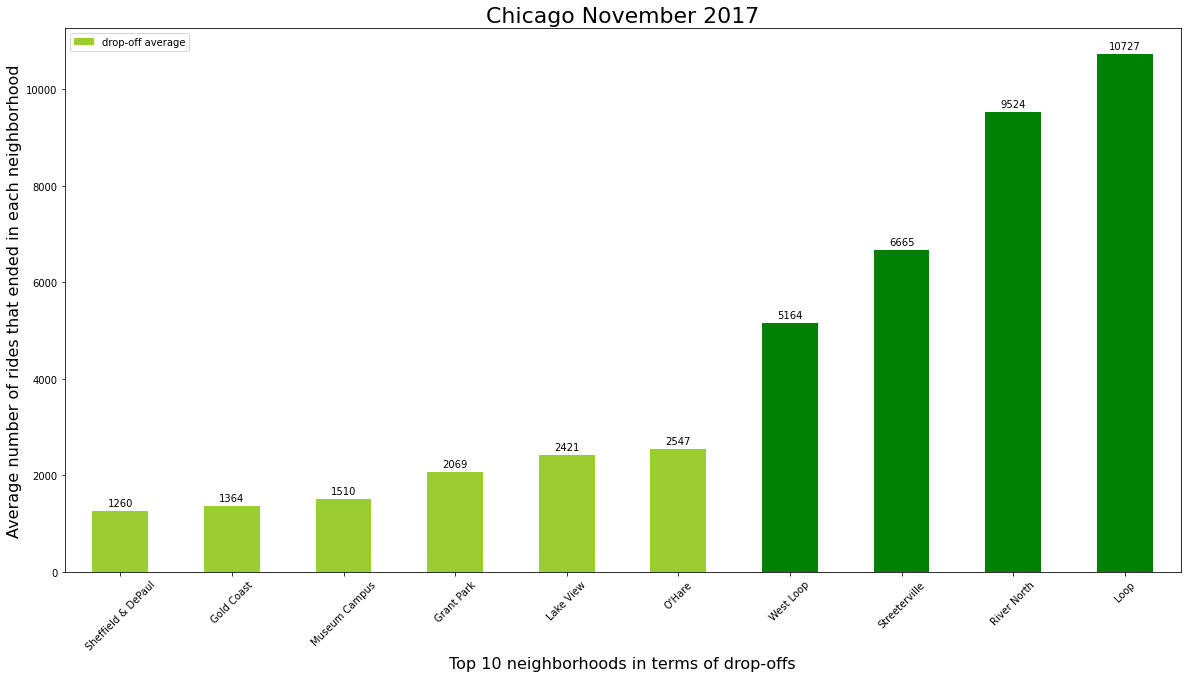

In [48]:
best_drop_off_neighborhoods['colors']=['yellowgreen' if y < 3000
                                                     else 'green' for y in best_drop_off_neighborhoods['average_trips']]


ax = best_drop_off_neighborhoods.plot(kind='bar',x='dropoff_location_name',y='average_trips',color=best_drop_off_neighborhoods['colors'],figsize=(20,10), rot=45,label='drop-off average')
plt.legend(loc="best")
plt.title("Chicago November 2017",fontdict={'size':22})
plt.xlabel("Top 10 neighborhoods in terms of drop-offs",fontdict={'size':16});
plt.ylabel("Average number of rides that ended in each neighborhood",fontdict={'size':16})
plt.legend(ncol=210);
plt.legend(loc="upper left")

for item in ax.patches:
    height = item.get_height()
    ax.annotate('{:.0f}'.format(height),
            xy=(item.get_x() + item.get_width() / 2, height),
            xytext=(0, 3),  
            textcoords="offset points",
            ha='center', va='bottom')
plt.show()

**Conclusion**

Here we see the top 10 Average number of rides that ended in each neighborhood. Whereby among the top 10 Loop with (unrecognizable average of drop-offs) reached the highest value with 10727 and 1259 off the top 10 is the lowest value for Sheffield & DePaul. 

<a name="5"></a>  
**5. make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs** [back to the tasks](#table_of_contents)

In [13]:
company_trips = company_time.groupby(['trips_amount'])['company_name'].max().tail(10).reset_index()
company_trips

,trips_amount,company_name
0,5953,Blue Ribbon Taxi Association Inc.
1,7455,Star North Management LLC
2,7701,Sun Taxi
3,8448,City Service
4,9181,Chicago Carriage Cab Corp
5,9299,Taxi Affiliation Service Yellow
6,9888,Yellow Cab
7,10367,Medallion Leasin
8,11422,Taxi Affiliation Services
9,19558,Flash Cab


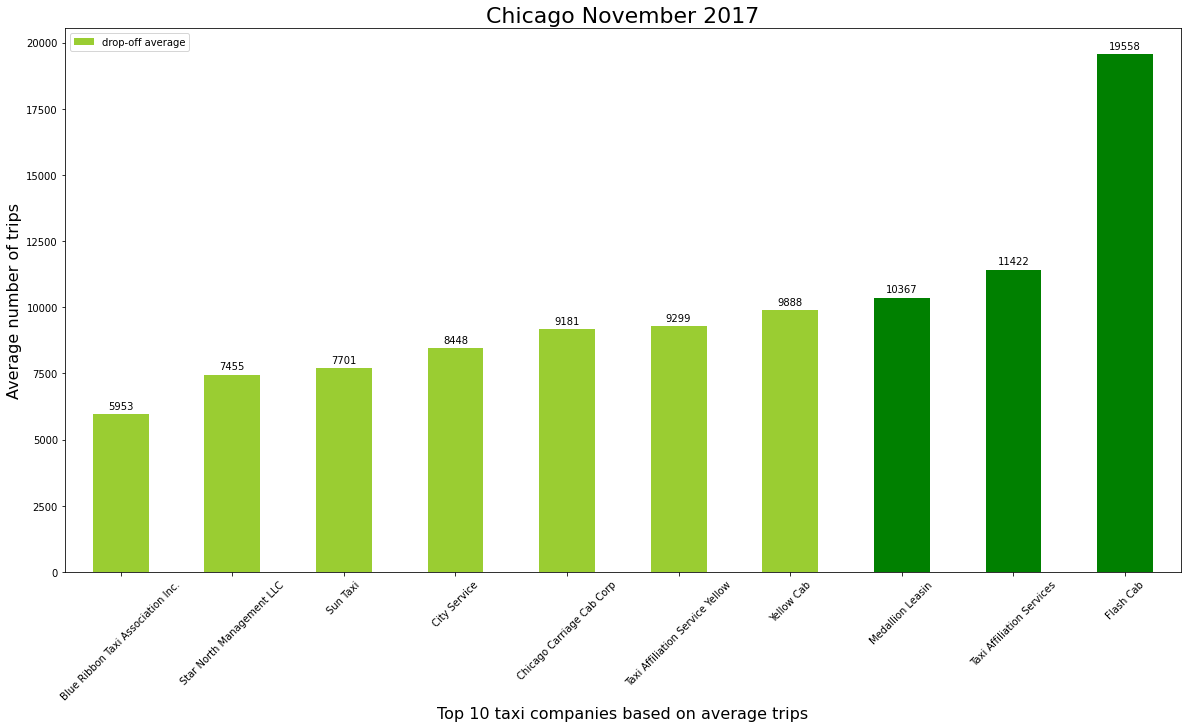

In [14]:
company_trips['colors']=['yellowgreen' if y < 10000 else \
                         'green' for y in company_trips['trips_amount']]



ax = company_trips.plot(kind='bar',x='company_name',y='trips_amount',color= company_trips['colors'] ,figsize=(20,10), rot=45,label='drop-off average')
plt.legend(loc="best")
plt.title("Chicago November 2017",fontdict={'size':22})
plt.xlabel("Top 10 taxi companies based on average trips",fontdict={'size':16});
plt.ylabel("Average number of trips",fontdict={'size':16})
plt.legend(ncol=210);
plt.legend(loc="upper left")

for item in ax.patches:
    height = item.get_height()
    ax.annotate('{:.0f}'.format(height),
            xy=(item.get_x() + item.get_width() / 2, height),
            xytext=(0, 3),  
            textcoords="offset points",
            ha='center', va='bottom')
plt.show()

**Conclusion**  

we have already made the first graphic in the previous task, therefore I have only listed the top 10 taxi companies here and presented them in a graphic. The Chicago company Flash Cab clearly outperformed its competitors in November 2017 in terms of the average number of trips with 19558. Based on these values, Blue Ribbon Taxi Association Inc. is the worst among the top 10 with 5953. 

<a name="6"></a>  
**6. draw conclusions based on each graph and explain the results** [back to the tasks](#table_of_contents)

I have already made conclusions in the above tasks to add is that we have too little data to draw further conclusions as for example why this could be and perhaps other periods of time or further data and facts on the individual points... 

So why could this be the Loop and River North are the districts that have the largest average of taxi rides. 
The reason could be that these areas belong to the urban core. This is where most of the people move to work where they meet to spend their free time... This is where most of the people's lives in the city take place a lot of shops, the stadium, the park harbor and the people also work there... This could speak for it but these are all only theses that could explain why this is so. We have no data on the reason why people go there. The probability is of course obvious that in areas where there are more people also is more traffic of people movingand and they then use the taxi and other means of transport more often than in other areas of the city . Based on this pictures<img src="https://www.goldcoastrealty-chicago.com/images/gold_coast_realty_768.jpg" alt="Alt-Text" title="Chicago_aeria" />
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Chicago_Downtown_Aerial_View.jpg" alt="Alt-Text" title="Chicago" />
you can also see that the tallest buildings in the city are located in these two areas  (Loop and River North). This is due to the high demand in these parts of the city as the space is limited they had to built so high there to meet the demand. One could add to the taxi company Flash Cab that they are probably concentrated on those areas where the demand​ is very high. In addition, the taxis have a different color than the other taxis.<img src="https://s3-media0.fl.yelpcdn.com/bphoto/K8-zIkdugH7v-9FyvZyDUQ/o.jpg" alt="Alt-Text" title="Chicago" /> 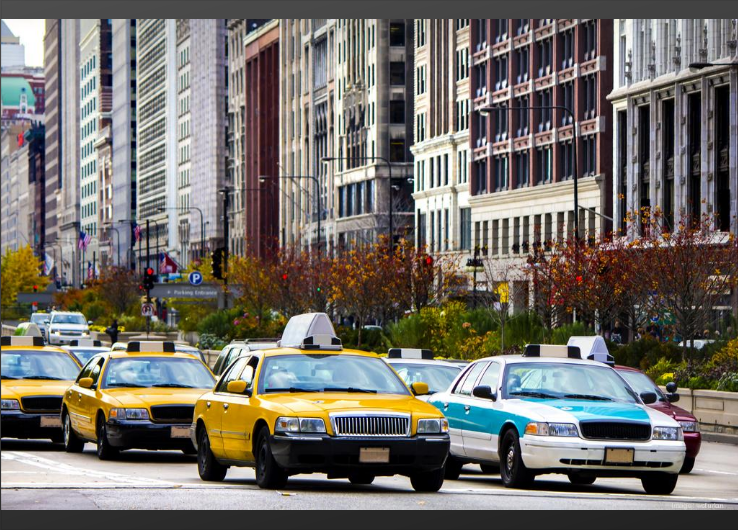So the company probably has a different market strategy (brand recognition value..., maybe different prices ...)than his competition that seems to be successful and maybe the company also has a larger number of taxis. We do not know that. That could also help Flash Cab to transport more far guests. These are all assumptions as we have no data on which to base our speculations. There are also some reasons that support these assumptions but we only know exactly when we have data on these points on which we can put our theses in order to underpin them and this too can then turn out to be wrong...

Unfortunately, I didn't find any data on the internet that I could use to confirm these theses. (web mining)


### Step 5. Testing hypotheses (Python)

**Test the hypothesis:**
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
Decide where to set the significance level (alpha) on your own.

Explain:

  *  how you formed the null and alternative hypotheses
  *  what criterion you used to test the hypotheses and why

We always state H0 as an equiation and H1 as the difference so our hypotes is as follows.    
H0 == The average duration remains the same regardless of the weather. The duration is the same.   
H1 != The average duration depends on the weather and the duration is longer in bad weather.The duration is not the same. 

But first we take a look at our data.

In [15]:
result.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


 The Shapiro-Wilk Test tests whether there is a Gaussian distribution/normal distribution.
We do a Shapiro-Wilk Test to see whether the distribution corresponds to a normal distribution or not. 

In [16]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(result['duration_seconds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.930, p=0.000
Sample does not look Gaussian (reject H0)


In our case it looks like the distribution does not correspond to the normal distribution 

To look at the whole thing again graphically, we make a quantile-quantile plot this makes a sample of our distribution and gives it back as a scatter plot. 

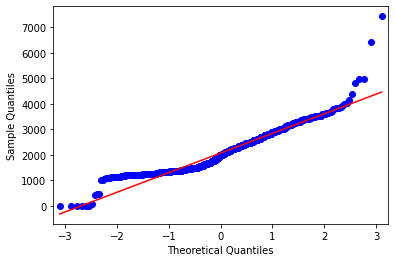

In [30]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(result['duration_seconds'], line='s')

pyplot.show()

So we first have to pre-sort the data so that we have the correct data for our hypothesis. We will do this below and test our hypotesis immediately afterwards. 

In [18]:
bad_weather = result[result['weather_conditions']== 'Bad']
good_weather = result[result['weather_conditions']== 'Good']
bad_weather_duration = bad_weather['duration_seconds']
good_weather_duration = good_weather['duration_seconds']
alpha = .05#statistical significance level


results = st.ttest_ind(bad_weather_duration , good_weather_duration , equal_var = False)
#is testing the hypothesis that the means of the two are equal (H0) no they are the same is the 0 hypotesis ==

print('p-value:', results.pvalue)#print the p-value

if (results.pvalue < alpha):#compare the p-value with the significance level
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 6.738994326108734e-12
We reject the null hypothesis


Besides, one could do a Mann-Whitney U Test

Tests whether the distributions of two independent samples are equal or not.  

H0: the distributions of both samples are equal.
H1: the distributions of both samples are not equal.

In [19]:
#Mann-Whitney U Test
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(bad_weather_duration, good_weather_duration)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else: 
    print('Probably different distributions')

stat=51646.500, p=0.000
Probably different distributions


We have tested our 0 hypothesis and it turned out that the times are not the same, so we reject the 0 hypothesis. 

In [20]:
print('Bad weather duration mean:',bad_weather_duration.mean())
print('Good weather duration mean:',good_weather_duration.mean())

Bad weather duration mean: 2427.2055555555557
Good weather duration mean: 1999.6756756756756


**Conclusion**  

We tested the hypotesis H0 that the duration remains the same even in bad weather conditions and it turned out that this is not true, so we rejected the null hypothesis and looked at the averages of both conditions and there we can see that the average duration in bad weather conditions is around approx. 7 minutes longer than in good weather conditions. 

**Overall conclusion**

for the taxi companies and the city districts have drawn counts and made a big overall conclusion unfortunately we have not found any further data on the net to support our theses. For the weather conditions we tested our thesis using our SQL data and found out that the travel times worsened depending on the weather in relation to the duration. The journeys take an average of 7 minutes longer in bad weather. This is probably due to aspects such as poor visibility conditions and then with even more caution that the drivers then need to do. But maybe it also plays a role that people want to get to their destination faster to enjoy the good weather and when the weather is bad, there is more sluggishness (the stone age brain that does not want to burn the calories in bad weather conditions who knows when it will find something to eat again under these conditions). After all, that is also a reason why we love unhealthy food compared to healthy food because we get more calories and the brain did not want to understand that it always gets enough to eat and does not have to accumulate. So it does the opposite of what we want, but sometimes it wins against discipline. 